# Experience with filters in Fourier

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dx = 0.01
x = np.arange(-5,5,dx)
N = len(x)
f = x / N / dx
# Normalized frequency (from zero to one)
fN = np.arange(0,N)/N

## Difference of Gaussians
we define the Gaussian function:
$$g_{\sigma}(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{x^2}{2\sigma^2}}
$$

In [3]:
def Gauss(x, sigma):
    return np.exp(-x**2/(2*sigma**2)) / (sigma*np.sqrt(2*np.pi))

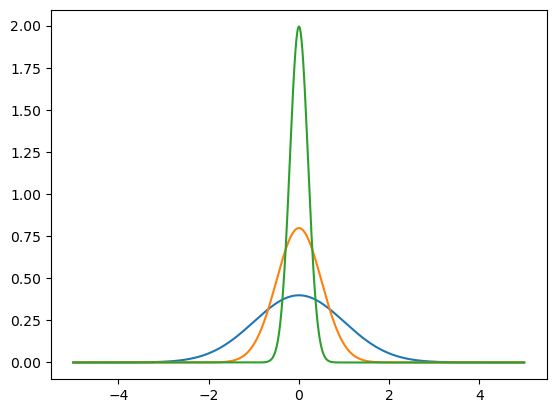

In [4]:
# plot in the spatial domain
plt.plot(x,Gauss(x,1))
plt.plot(x,Gauss(x,0.5))
plt.plot(x,Gauss(x,0.2))
plt.show()

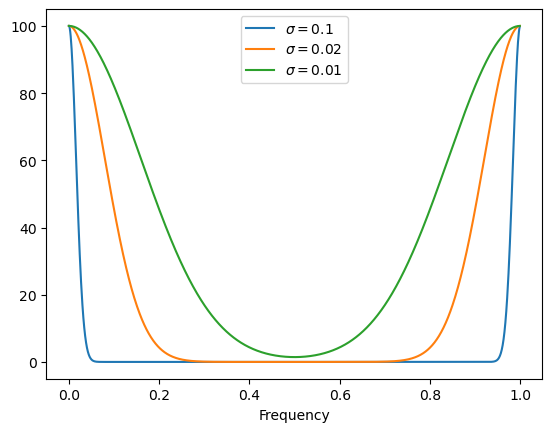

In [5]:
G1 = Gauss(x,0.1)
G2 = Gauss(x,0.02)
G3 = Gauss(x,0.01)

plt.plot(fN, np.abs(np.fft.fft(G1)), label='$\sigma = 0.1$')
plt.plot(fN, np.abs(np.fft.fft(G2)), label='$\sigma = 0.02$')
plt.plot(fN, np.abs(np.fft.fft(G3)), label='$\sigma = 0.01$')
#plt.axis('off')
#plt.xticks([0])
#plt.yticks([])
plt.xlabel('Frequency')
plt.legend()
plt.show()

In [6]:
np.linalg.norm(G1,1), np.linalg.norm(G2,1)

(100.00000000000216, 100.00000000000215)

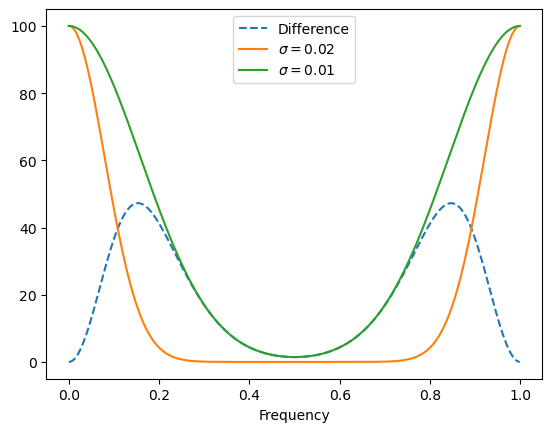

In [7]:
plt.plot(fN, np.abs(np.fft.fft(G3-G2)),'--', label='Difference')
plt.plot(fN, np.abs(np.fft.fft(G2)), label='$\sigma = 0.02$')
plt.plot(fN, np.abs(np.fft.fft(G3)), label='$\sigma = 0.01$')
#plt.axis('off')
#plt.xticks([0])
#plt.yticks([])
plt.xlabel('Frequency')
plt.legend()
plt.show()

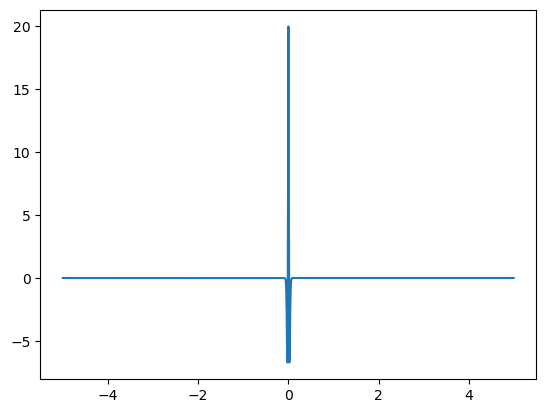

In [8]:
# In the spatial domain, the difference gives an oscillating function
plt.plot(x,G3-G2)
plt.show()

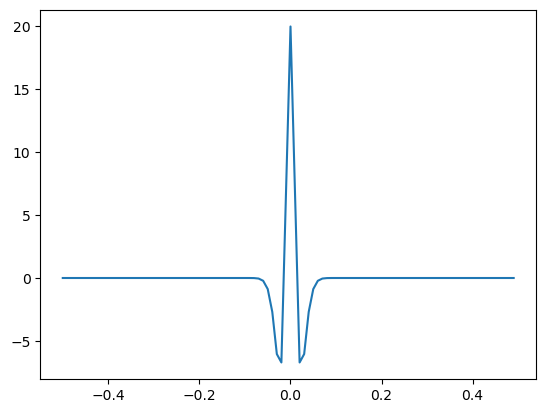

In [9]:
# Zoom
plt.plot(x[450:550],(G3-G2)[450:550])
plt.show()

## Filter design in the Fourier domain
Let us design some filters based on Gaussians in the Fourier domain and see the result in the spatial domain.

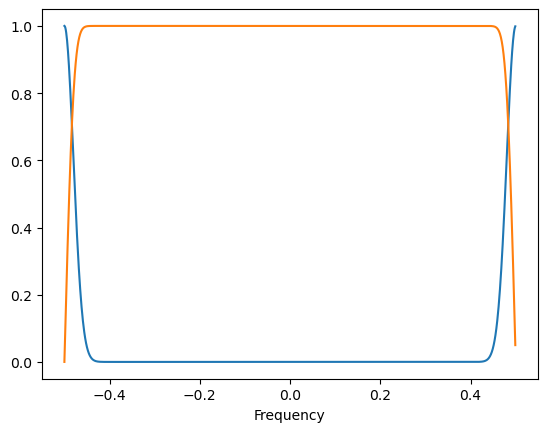

In [10]:
s = 0.2
G = np.fft.fftshift((Gauss(x,s))) 
G = G / np.max(G)
#Complementary filter
Gc = np.sqrt(1 - G**2)
plt.plot(f, G)
plt.plot(f, Gc)
#plt.xticks([0])
#plt.yticks([])
plt.xlabel('Frequency')
plt.show()

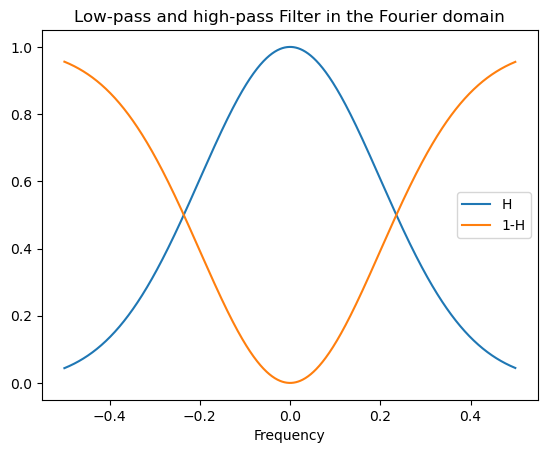

In [11]:
s = 2
#G = np.fft.fftshift((Gauss(x,s))) 
G = (Gauss(x,s))
G = G / np.max(G)
#Complementary filter
Gc = (1 - G)
plt.figure(dpi=100)
plt.plot(f, G, label='H')
plt.plot(f, Gc, label='1-H')
#plt.xticks([0])
#plt.yticks([])
plt.title('Low-pass and high-pass Filter in the Fourier domain')
plt.xlabel('Frequency')
plt.legend()
plt.show()

Let us go back in the spatial domain

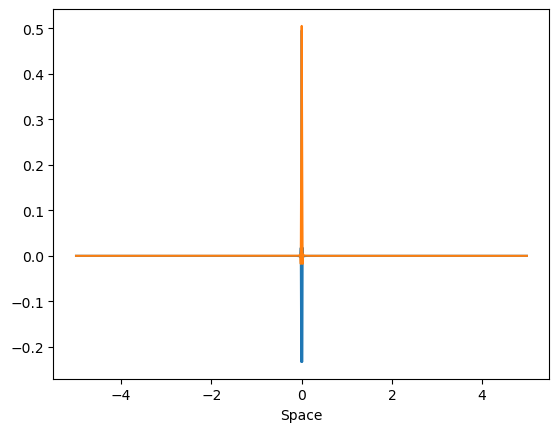

In [12]:
g = np.real(np.fft.fftshift(np.fft.ifft(G)))
h = np.real(np.fft.fftshift(np.fft.ifft(Gc)))
plt.plot(x, g)
plt.plot(x, h)
#plt.xticks([0])
#plt.yticks([])
plt.xlabel('Space')
plt.show()

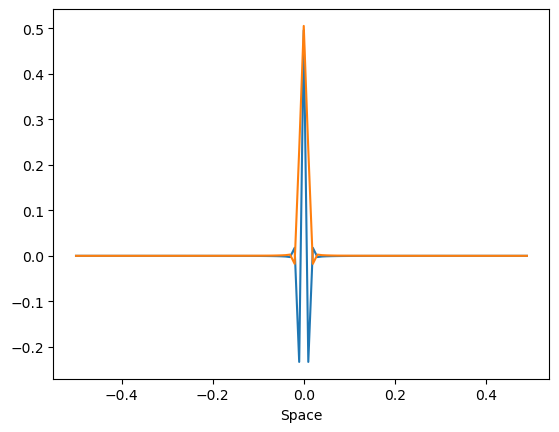

In [13]:
plt.plot(x[450:550], g[450:550])
plt.plot(x[450:550], h[450:550])
#plt.xticks([0])
#plt.yticks([])
plt.xlabel('Space')
plt.show()

Let us introduce a rectangular function

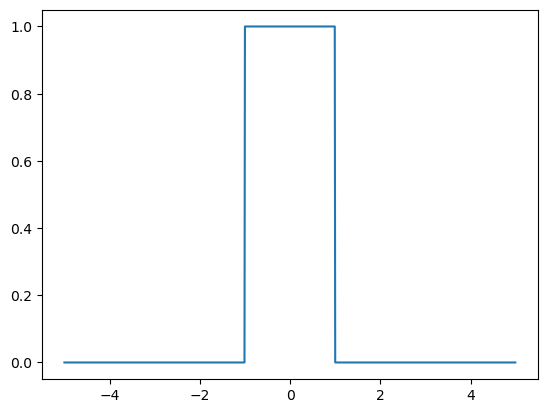

In [14]:
# Test function for the transformation
z = np.zeros(x.shape)
z[400:600] = 1
plt.plot(x,z)
plt.show()

The transform: projecting on the set of filters using the convolution

In [15]:
# projection on the lowpass filter
zLP = np.convolve(z,g,'same')
# projection on the highpass filter
zHP = np.convolve(z,h, 'same')

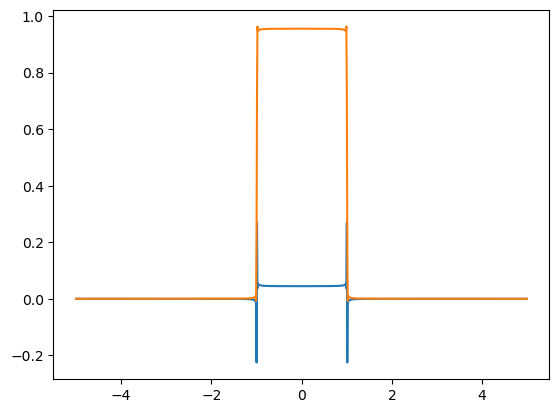

In [16]:
plt.plot(x,zLP)
plt.plot(x,zHP)
plt.show()

The inverse transform: convolution with the same set of vectors and sum the filter contributions

In [17]:
zprime  = np.convolve(zLP,g,'same') + np.convolve(zHP,h,'same')

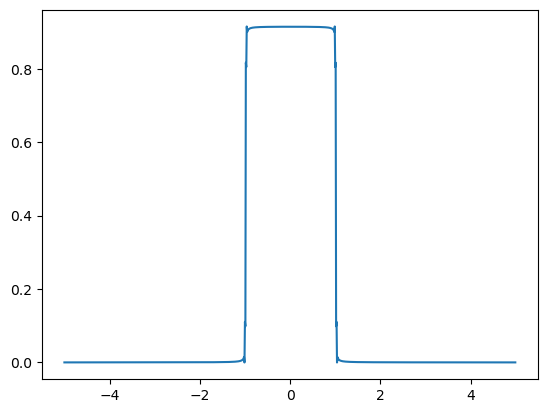

In [18]:
# Check the reconstruction
plt.plot(x,zprime)
plt.show()

 We recover the initial function. It is expected as the filterbank is designed such that the power spectrum of the filters sums to one: $ |g|^2+ |h|^2=1$

## Gabor wavelet and filterbanks
Let us introduce the Gabor wavelet:
$$g_{\sigma}(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{x^2}{2\sigma^2}}\cos(2\pi x)
$$
and its scaled versions
$$\frac{1}{\sqrt{s}}g_{\sigma}(\frac{x}{s}) = \frac{1}{\sigma\sqrt{2s\pi}}e^{-\frac{x^2}{2(s\sigma)^2}}\cos(2\pi \frac{x}{s})
$$

In [19]:
def GaborWavelet(x, s, sigma=1):
    envelop = 1/np.sqrt(s)* np.exp(-x**2/(2*(s*sigma)**2)) / (np.sqrt(2*np.pi*sigma)) 
    return envelop * np.cos(2*np.pi*x/s) 

### In the spatial domain

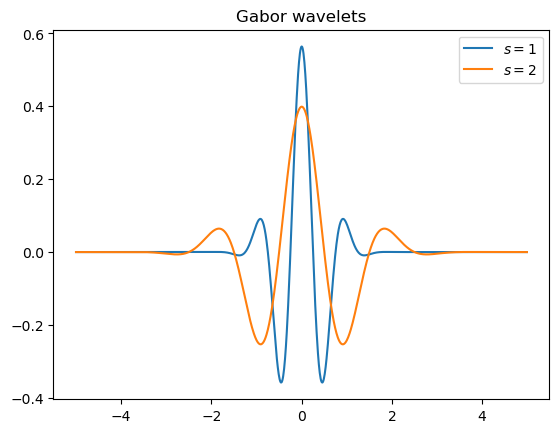

In [20]:
s = 1
plt.plot(x,GaborWavelet(x,s,0.5), label='$s = {}$'.format(s))
s = 2
plt.plot(x,GaborWavelet(x,s,0.5), label='$s = {}$'.format(s))
plt.title('Gabor wavelets')
plt.legend()
plt.show()

Both waveforms have the same shape. Since one is dilated over time, its oscillation frequency is different. The frequency increase as the function shrinks.

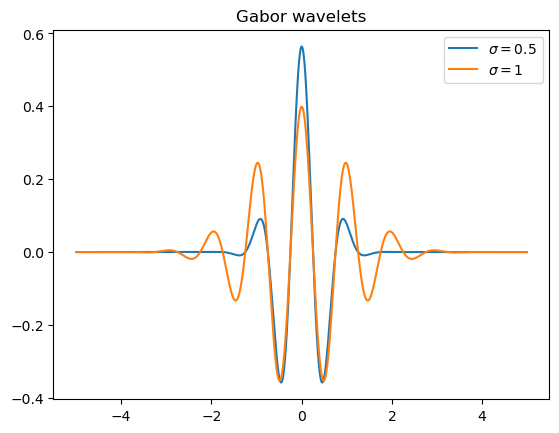

In [21]:
sigma = 0.5
plt.plot(x,GaborWavelet(x,1,sigma), label='$\sigma = {}$'.format(sigma))
sigma = 1
plt.plot(x,GaborWavelet(x,1,sigma), label='$\sigma = {}$'.format(sigma))
plt.title('Gabor wavelets')
plt.legend()
plt.show()

Both functions have the same oscillating frequency. The function with $\sigma=0.5$ decrease faster away from zero, as its Gaussian envelope decreases faster.

### In the frequency domain

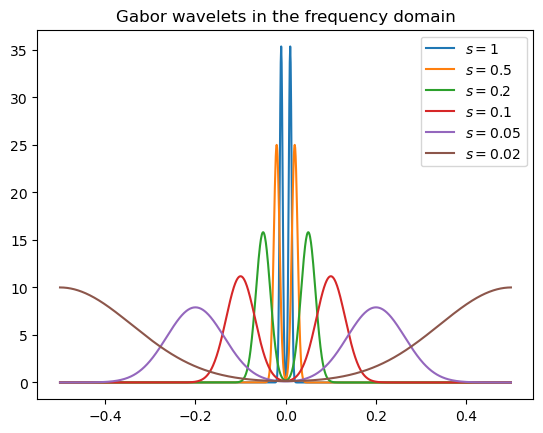

In [22]:
total = np.zeros(f.shape)
for s in [1, 0.5, 0.2, 0.1, 0.05, 0.02]:
    fourierrep = np.fft.fftshift(np.abs(np.fft.fft(GaborWavelet(x,s,0.5))))
    plt.plot(f, fourierrep, label='$s = {}$'.format(s))
    total += fourierrep
#plt.plot(f, total, 'k', label='Total')
plt.title('Gabor wavelets in the frequency domain')
plt.legend()
plt.show()

Wavelets filters with scales following a power of $2$

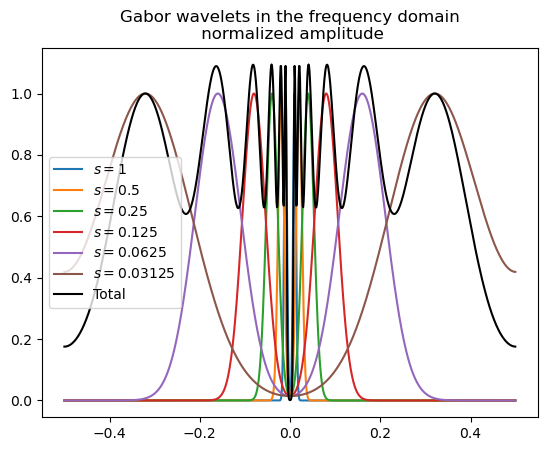

In [23]:
total = np.zeros(f.shape)
for s in [1, 1/2, 1/4, 1/8, 1/16, 1/32]:
    fourierrep = np.fft.fftshift(np.abs(np.fft.fft(GaborWavelet(x,s,0.5))))
    # normalizing the max to 1
    fourierrep = fourierrep / np.max(fourierrep)
    plt.plot(f, fourierrep, label='$s = {}$'.format(s))
    total += fourierrep**2
plt.plot(f, total, 'k', label='Total')
plt.title('Gabor wavelets in the frequency domain\n normalized amplitude')
plt.legend()
plt.show()

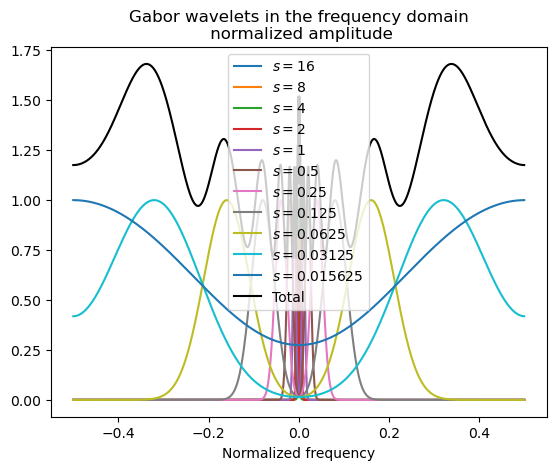

In [24]:
# More filters to obtain a flatter total curve
total = np.zeros(f.shape)
plt.figure(dpi=100)
for s in [16, 8, 4, 2, 1, 1/2, 1/4, 1/8, 1/16, 1/32, 1/64]:
    fourierrep = np.fft.fftshift(np.abs(np.fft.fft(GaborWavelet(x,s,0.5))))
    # normalizing the max to 1
    fourierrep = fourierrep / np.max(fourierrep)
    plt.plot(f, fourierrep, label='$s = {}$'.format(s))
    total += fourierrep**2
plt.plot(f, total, 'k', label='Total')
plt.title('Gabor wavelets in the frequency domain\n normalized amplitude')
plt.xlabel('Normalized frequency')
plt.legend()
plt.show()

We do not loose any information from the original signal by projection it onto the set of filters as long as the black curve is >0. However, the signal may be distorded if we use the same set of filters for the inverse transform, as the black curve is not a constant.